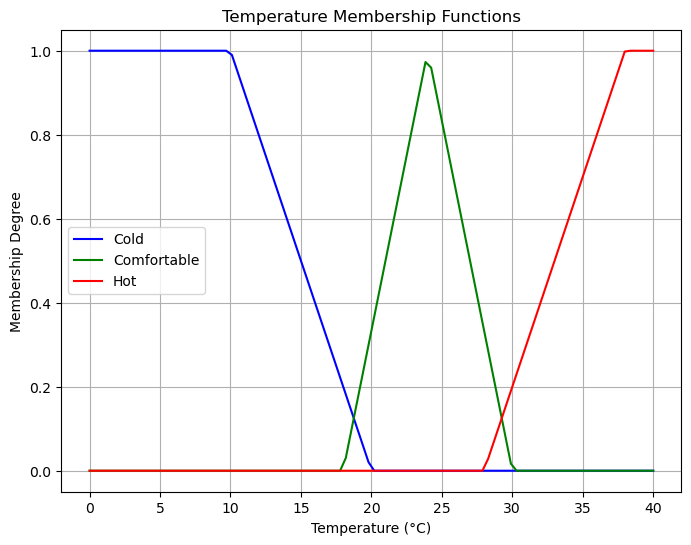

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Membership functions for "Cold," "Comfortable," and "Hot" 
def cold_membership(temp):
    """Membership function for 'Cold' temperature."""
    return np.maximum(0, np.minimum(1, (20 - temp) / 10)) # Triangle with peak at 10°C 
def comfortable_membership(temp):
    """Membership function for 'Comfortable' temperature."""
    return np.maximum(0, np.minimum((temp - 18) / 6, (30 - temp) / 6)) # Trapezoidal shape 
def hot_membership(temp):
    """Membership function for 'Hot' temperature."""
    return np.maximum(0, np.minimum(1, (temp - 28) / 10)) # Triangle with peak at 40°C

# Rule-based control actions 
def control_action(temp):
    """Determine control action based on fuzzy rules.""" 
    cold_degree = cold_membership(temp) 
    comfortable_degree = comfortable_membership(temp) 
    hot_degree = hot_membership(temp)

# Rule evaluation
    if cold_degree > max(comfortable_degree, hot_degree): 
        return "Increase heating"
    elif comfortable_degree > max(cold_degree, hot_degree): 
        return "Maintain current setting"
    elif hot_degree > max(cold_degree, comfortable_degree): 
        return "Increase cooling"
# Simulate the system for specific temperatures 
    temperatures = [18, 24, 32]
    actions = []

    for temp in temperatures:
        action = control_action(temp) 
        actions.append((temp, action))
        print(f"At {temp}°C, the system suggests: {action}") # Visualizing membership functions
def plot_membership_functions():
    """Plot the membership functions for 'Cold,' 'Comfortable,' and 'Hot'.""" 
    temperature_range = np.linspace(0, 40, 100)
    cold = [cold_membership(t) for t in temperature_range]
    comfortable = [comfortable_membership(t) for t in temperature_range] 
    hot = [hot_membership(t) for t in temperature_range]
    plt.figure(figsize=(8, 6))
    plt.plot(temperature_range, cold, label="Cold", color="blue") 
    plt.plot(temperature_range, comfortable, label="Comfortable", color="green") 
    plt.plot(temperature_range, hot, label="Hot", color="red") 
    plt.title("Temperature Membership Functions")
    plt.xlabel("Temperature (°C)") 
    plt.ylabel("Membership Degree") 
    plt.legend()
    plt.grid(True) 
    plt.show()
# Plot the membership functions plot_membership_functions()
plot_membership_functions()

In [22]:
pip install -U scikit-fuzzy

   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 10.2/920.8 kB ? eta -:--:--
    -------------------------------------- 20.5/920.8 kB 165.2 kB/s eta 0:00:06
    -------------------------------------- 20.5/920.8 kB 165.2 kB/s eta 0:00:06
    -------------------------------------- 20.5/920.8 kB 165.2 kB/s eta 0:00:06
   - ------------------------------------- 30.7/920.8 kB 109.5 kB/s eta 0:00:09
   - ------------------------------------- 41.0/920.8 kB 140.9 kB/s eta 0:00:07
   - ------------------------------------- 41.0/920.8 kB 140.9 kB/s eta 0:00:07
   -- ------------------------------------ 61.4/920.8 kB 149.3 kB/s eta 0:00:06
   -- ------------------------------------ 61.4/920.8 kB 149.3 kB/s eta 0:00:06
   --- ----------------------------------- 81.9/920.8 kB 183.8 kB/s eta 0:00:05
   --- ----------------------------------- 92.2/920.8 kB 180.8 kB/

In [23]:
import numpy as np 
import skfuzzy as fuzz
from skfuzzy import control as ctrl # Define input variables
marination_level = ctrl.Antecedent(np.arange(0, 101, 1), 'Marination Level')
cooking_temp = ctrl.Antecedent(np.arange(0, 301, 1), 'Cooking Temperature') # Define output variable
cooking_time = ctrl.Consequent(np.arange(0, 121, 1), 'Cooking Time') # Define fuzzy membership functions for inputs and output
marination_level['Low'] = fuzz.trimf(marination_level.universe, [0, 0, 30])
marination_level['Medium'] = fuzz.trimf(marination_level.universe, [20, 50, 80])
marination_level['High'] = fuzz.trimf(marination_level.universe, [70, 100, 100])

cooking_temp['Low'] = fuzz.trimf(cooking_temp.universe, [0, 0, 150])
cooking_temp['Medium'] = fuzz.trimf(cooking_temp.universe, [100, 175, 250])
cooking_temp['High'] = fuzz.trimf(cooking_temp.universe, [200, 300, 300])

cooking_time['Short'] = fuzz.trimf(cooking_time.universe, [0, 0, 40])
cooking_time['Moderate'] = fuzz.trimf(cooking_time.universe, [30, 60, 90])
cooking_time['Long'] = fuzz.trimf(cooking_time.universe, [80, 120, 120])

# Define fuzzy rules
rule1 = ctrl.Rule(marination_level['High'] & cooking_temp['High'], cooking_time['Short'])
rule2 = ctrl.Rule(marination_level['Medium'] & cooking_temp['Medium'], cooking_time['Moderate']) 
rule3 = ctrl.Rule(marination_level['Low'] & cooking_temp['Low'], cooking_time['Long'])

# Create control system and simulation
cooking_control = ctrl.ControlSystem([rule1, rule2, rule3]) 
cooking_simulation = ctrl.ControlSystemSimulation(cooking_control)

# Input values and compute crisp output 
cooking_simulation.input['Marination Level'] = 60 
cooking_simulation.input['Cooking Temperature'] = 200 
cooking_simulation.compute()

# Display the crisp output
print(f"Crisp Cooking Time: {cooking_simulation.output['Cooking Time']:.2f} minutes")


Crisp Cooking Time: 60.00 minutes


In [24]:
def low_light(x):
    if x <= 30:
        return 1
    elif 30 < x <= 60:
        return (60 - x) / 30
    else:
        return 0
def moderate_light(x):
    if 30 < x <= 60:
        return (x - 30) / 30
    elif 60 < x <= 90:
        return (90 - x) / 30
    else:
        return 0
def high_light(x):
    if x <= 60:
        return 0
    elif 60 < x <= 90:
        return (x - 60) / 30
    else:
        return 1
natural_light_intensity = 60
low = low_light(natural_light_intensity)
moderate = moderate_light(natural_light_intensity)
high = high_light(natural_light_intensity)
rules_triggered = {
    "Increase Brightness": low,
    "Maintain Brightness": moderate,
    "Decrease Brightness": high
}
rules_triggered

{'Increase Brightness': 0.0,
 'Maintain Brightness': 1.0,
 'Decrease Brightness': 0}

Crisp Baking Time: 13.00 minutes


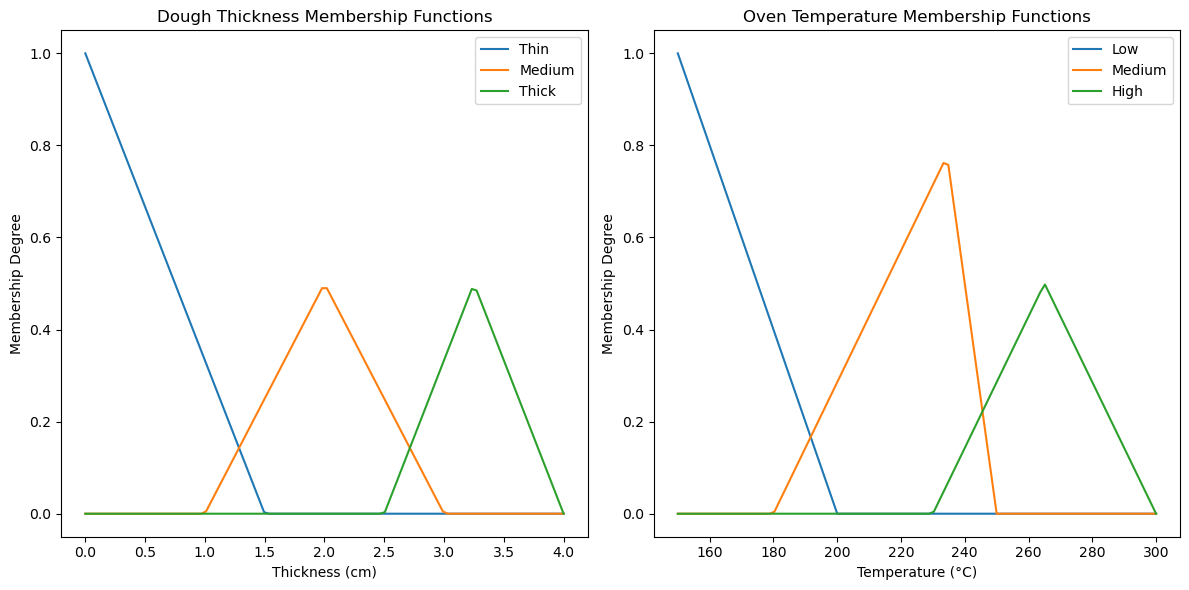

In [25]:
import numpy as np
import matplotlib.pyplot as plt
def dough_thickness_membership(thickness):
    thin = max(0, min(1, (1.5 - thickness) / 1.5))
    medium = max(0, min((thickness - 1) / 2, (3 - thickness) / 2))
    thick = max(0, min((thickness - 2.5) / 1.5, (4 - thickness) / 1.5))
    return thin, medium, thick
def oven_temperature_membership(temperature):
    low = max(0, min(1, (200 - temperature) / 50))
    medium = max(0, min((temperature - 180) / 70, (250 - temperature) / 20))
    high = max(0, min((temperature - 230) / 70, (300 - temperature) / 70))
    return low, medium, high
def baking_time_membership(time):
    short = max(0, min(1, (10 - time) / 5))
    moderate = max(0, min((time - 8) / 10, (18 - time) / 10))
    long = max(0, min((time - 15) / 10, (25 - time) / 10))
    return short, moderate, long
def apply_fuzzy_rules(dough_thickness_mf, oven_temp_mf):
    dough_thin, dough_medium, dough_thick = dough_thickness_mf
    oven_low, oven_medium, oven_high = oven_temp_mf
    baking_time_short = min(dough_thin, oven_high)
    baking_time_moderate = min(dough_medium, oven_medium)
    baking_time_long = min(dough_thick, oven_low)
    return baking_time_short, baking_time_moderate, baking_time_long
def defuzzify(baking_time_mf):
    baking_time_short, baking_time_moderate, baking_time_long = baking_time_mf
    numerator = (baking_time_short * np.arange(5, 11).mean() +
                 baking_time_moderate * np.arange(8, 19).mean() +
                 baking_time_long * np.arange(15, 26).mean())
    denominator = (baking_time_short + baking_time_moderate + baking_time_long)
    return numerator / denominator if denominator != 0 else 0
dough_thickness_input = 2.5
oven_temperature_input = 220
dough_thickness_mf = dough_thickness_membership(dough_thickness_input)
oven_temp_mf = oven_temperature_membership(oven_temperature_input)
baking_time_mf = apply_fuzzy_rules(dough_thickness_mf, oven_temp_mf)
crisp_baking_time = defuzzify(baking_time_mf)
print(f'Crisp Baking Time: {crisp_baking_time:.2f} minutes')
def plot_membership_functions():
    thickness_values = np.linspace(0, 4, 100)
    temperature_values = np.linspace(150, 300, 100)
    thickness_mfs = [dough_thickness_membership(x) for x in thickness_values]
    temp_mfs = [oven_temperature_membership(x) for x in temperature_values]
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(thickness_values, [mf[0] for mf in thickness_mfs], label='Thin')
    plt.plot(thickness_values, [mf[1] for mf in thickness_mfs], label='Medium')
    plt.plot(thickness_values, [mf[2] for mf in thickness_mfs], label='Thick')
    plt.title('Dough Thickness Membership Functions')
    plt.xlabel('Thickness (cm)')
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(temperature_values, [mf[0] for mf in temp_mfs], label='Low')
    plt.plot(temperature_values, [mf[1] for mf in temp_mfs], label='Medium')
    plt.plot(temperature_values, [mf[2] for mf in temp_mfs], label='High')
    plt.title('Oven Temperature Membership Functions')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_membership_functions()